In [32]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import silhouette_score
from sklearn.cluster import SpectralClustering 

In [33]:
data = pd.read_csv('dataset/iris.csv')

In [34]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
data.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [36]:
data.drop(['Id', 'Species'],axis=1, inplace = True)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [37]:
import random
output = []
for i in range(10):
    r = random.randint(1, 5)
    list1 = []
    for j in range(r):
        list1.append(random.randint(0, 3))
    #print(list1)
    list2 = []
    [list2.append(x) for x in list1 if x not in list2]
    print(str(list2))
    random_col = data.iloc[:, list2].values
    print(random_col)

    kmeans = KMeans(n_clusters = 3, random_state =0).fit(random_col)
    partitionings = (kmeans.labels_)
#     print(partitionings)
    output.append(partitionings)
#     print(output)

output_matrix = np.array(output, dtype = int)
print(output_matrix)

# np.savetxt('output_1.txt', output_matrix, fmt = '%i')
    

[1, 0]
[[3.5 5.1]
 [3.  4.9]
 [3.2 4.7]
 [3.1 4.6]
 [3.6 5. ]
 [3.9 5.4]
 [3.4 4.6]
 [3.4 5. ]
 [2.9 4.4]
 [3.1 4.9]
 [3.7 5.4]
 [3.4 4.8]
 [3.  4.8]
 [3.  4.3]
 [4.  5.8]
 [4.4 5.7]
 [3.9 5.4]
 [3.5 5.1]
 [3.8 5.7]
 [3.8 5.1]
 [3.4 5.4]
 [3.7 5.1]
 [3.6 4.6]
 [3.3 5.1]
 [3.4 4.8]
 [3.  5. ]
 [3.4 5. ]
 [3.5 5.2]
 [3.4 5.2]
 [3.2 4.7]
 [3.1 4.8]
 [3.4 5.4]
 [4.1 5.2]
 [4.2 5.5]
 [3.1 4.9]
 [3.2 5. ]
 [3.5 5.5]
 [3.1 4.9]
 [3.  4.4]
 [3.4 5.1]
 [3.5 5. ]
 [2.3 4.5]
 [3.2 4.4]
 [3.5 5. ]
 [3.8 5.1]
 [3.  4.8]
 [3.8 5.1]
 [3.2 4.6]
 [3.7 5.3]
 [3.3 5. ]
 [3.2 7. ]
 [3.2 6.4]
 [3.1 6.9]
 [2.3 5.5]
 [2.8 6.5]
 [2.8 5.7]
 [3.3 6.3]
 [2.4 4.9]
 [2.9 6.6]
 [2.7 5.2]
 [2.  5. ]
 [3.  5.9]
 [2.2 6. ]
 [2.9 6.1]
 [2.9 5.6]
 [3.1 6.7]
 [3.  5.6]
 [2.7 5.8]
 [2.2 6.2]
 [2.5 5.6]
 [3.2 5.9]
 [2.8 6.1]
 [2.5 6.3]
 [2.8 6.1]
 [2.9 6.4]
 [3.  6.6]
 [2.8 6.8]
 [3.  6.7]
 [2.9 6. ]
 [2.6 5.7]
 [2.4 5.5]
 [2.4 5.5]
 [2.7 5.8]
 [2.7 6. ]
 [3.  5.4]
 [3.4 6. ]
 [3.1 6.7]
 [2.3 6.3]
 [3.  5.6]
 [2.5 5.5]
 [2

In [38]:
from sklearn.metrics import adjusted_rand_score
rand_matrix = []
for i in range(10):
    f = []
    for j in range(10):
        rand_score = adjusted_rand_score(output_matrix[i] ,output_matrix[j])
        f.append(rand_score)
    rand_matrix.append(f)
                    
arr_rand = np.array(rand_matrix)
arr_rand = np.sum(arr_rand , axis = 0)
print(arr_rand)

max_rand = np.argmax(arr_rand)
print("the referance label is : " , max_rand)

[6.85413049 5.76321294 7.30190738 7.02077051 7.30190738 6.54405656
 7.36888857 5.76321294 7.34187324 7.31401132]
the referance label is :  6


In [39]:
output_matrix

array([[2, 2, 2, ..., 1, 1, 0],
       [2, 2, 2, ..., 1, 0, 0],
       [1, 1, 1, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 1, 0, 0],
       [1, 1, 1, ..., 2, 2, 0],
       [1, 1, 1, ..., 2, 2, 2]])

In [40]:
ref_solution = output_matrix[max_rand]
ref_solution

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2])

In [41]:
def most_frequent(List):
    counter = 0
    num = List[0]

    for i in List:
        curr_frequency = List.count(i)
        if(curr_frequency> counter):
            counter = curr_frequency
            num = i
 
    return num

In [42]:
relabeled_list = []

for solution in output_matrix:
    zeros = [index for index, values in np.ndenumerate(solution) if values == 0]
    ones = [index for index, values in np.ndenumerate(solution) if values == 1]
    twos = [index for index, values in np.ndenumerate(solution) if values == 2]

    r_zeros = [values for index, values in np.ndenumerate(ref_solution) if index in zeros]
    r_ones = [values for index, values in np.ndenumerate(ref_solution) if index in ones]
    r_twos = [values for index, values in np.ndenumerate(ref_solution) if index in twos]

    zero_label = most_frequent(r_zeros)
    one_label = most_frequent(r_ones)
    two_label = most_frequent(r_twos)

    new_solution = solution.copy()
    new_solution[solution == zero_label] = 0
    new_solution[solution == one_label] = 1
    new_solution[solution == two_label] = 2

    relabeled_list.append(new_solution)

In [43]:
relabeled_matrix = np.array(relabeled_list)
relabeled_matrix

array([[1, 1, 1, ..., 2, 2, 0],
       [1, 1, 1, ..., 2, 0, 0],
       [1, 1, 1, ..., 2, 2, 2],
       ...,
       [1, 1, 1, ..., 2, 0, 0],
       [1, 1, 1, ..., 2, 2, 0],
       [1, 1, 1, ..., 2, 2, 2]])

In [44]:
np.savetxt('relabeled_clusters.txt', relabeled_matrix, fmt = '%i')

In [45]:
voting_list = []
for i in range(len(relabeled_matrix[0])):
    max_count= np.bincount(relabeled_matrix[:, i]).argmax()
    voting_list.append(max_count)  

In [46]:
voting_array = np.array(voting_list, dtype = int)
voting_array

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [47]:
threshold_voting_list = []
for i in range(len(relabeled_matrix[0])):
    max_count= np.bincount(relabeled_matrix[:, i])
    if max_count.max() >= 8:
        threshold_voting_list.append(max_count.argmax()) 
    else:
        threshold_voting_list.append(-1)

In [48]:
np.array(threshold_voting_list)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        0, -1,  0, -1,  0,  0, -1, -1,  0, -1,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1, -1,  2,  0,  0,  0,  0,  0, -1,  0,
        0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  2, -1,
        2, -1,  2,  2, -1,  2,  2,  2,  2,  2,  2, -1, -1,  2,  2,  2,  2,
        0,  2, -1,  2, -1,  2,  2,  0, -1,  2,  2,  2,  2,  2, -1, -1,  2,
        2,  2,  0,  2,  2,  2, -1,  2,  2,  2, -1,  2,  2, -1],
      dtype=int64)

In [49]:
data_array = np.array(data)

In [50]:
X_train = [att for att,label in zip(data_array, threshold_voting_list) if label >= 0]
X_test = [att for att,label in zip(data_array, threshold_voting_list) if label == -1]

In [51]:
y_train = [label for label in threshold_voting_list if label >= 0]

In [52]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)

In [53]:
model = SVC()

In [54]:
model.fit(X_train, y_train)

SVC()

In [55]:
classified_label = model.predict(X_test)

In [56]:
for i in range(len(threshold_voting_list)):
    count = 0
    if threshold_voting_list[i] == -1:
        threshold_voting_list[i] = classified_label[count]
        count += 1        

In [57]:
np.array(threshold_voting_list)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [58]:
# silhouette_avg = silhouette_score(data, threshold_voting_list)
# print("The silhouette score of the Iris dataset is:", silhouette_avg)

In [59]:
# silhouette_avg = silhouette_score(data, voting_list)
# print("The silhouette score of the Iris dataset is:", silhouette_avg)

In [60]:
spectral_model_rbf = SpectralClustering(n_clusters = 3, affinity ='rbf') 
spectral_cluster_label = spectral_model_rbf.fit_predict(data)
spectral_cluster_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [61]:
# spectral_model_nn = SpectralClustering(n_clusters = 3, affinity ='nearest_neighbors') 
# labels_nn = spectral_model_nn.fit_predict(data)
# labels_nn

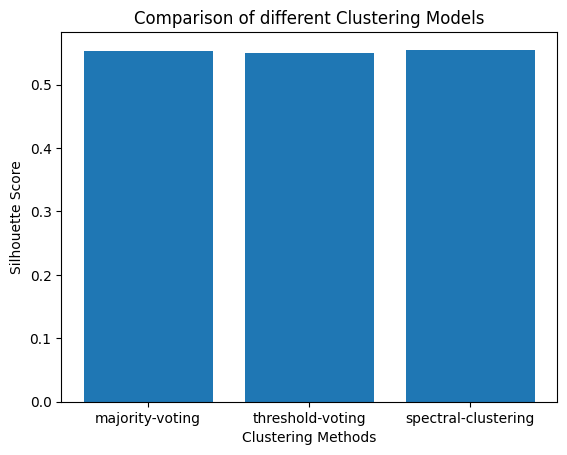

Silhouette Scores: [0.5531156214473464, 0.5493754840644722, 0.5550802152744265]


In [66]:
voting = ['majority-voting', 'threshold-voting', 'spectral-clustering'] 
  
# List of Silhouette Scores 
s_scores = [] 
  
# Evaluating the performance 
s_scores.append(silhouette_score(data, voting_array)) 
s_scores.append(silhouette_score(data, threshold_voting_list))
s_scores.append(silhouette_score(data, spectral_cluster_label)) 
# s_scores.append(silhouette_score(data, labels_nn))  
  
# Plotting a Bar Graph to compare the models 
plt.bar(voting, s_scores) 
plt.xlabel('Clustering Methods') 
plt.ylabel('Silhouette Score') 
plt.title('Comparison of different Clustering Models') 
plt.show() 

print(f'Silhouette Scores: {s_scores}')

In [64]:
majority_voting_SS= (silhouette_score(data, voting_array)) 
threshold_voting_SS= (silhouette_score(data, threshold_voting_list))
spectral_cluster_SS= (silhouette_score(data, spectral_cluster_label)) 
print(f'Silhouette Score of majority voting cluser: {majority_voting_SS}')
print(f'Silhouette Score of threshold voting cluser: {threshold_voting_SS}')
print(f'Silhouette Scoreof Spectral Cluster: {spectral_cluster_SS}')

Silhouette Score of majority voting cluser: 0.5531156214473464
Silhouette Score of threshold voting cluser: 0.5493754840644722
Silhouette Scoreof Spectral Cluster: 0.5550802152744265
